# Question 3

Following line defines file path and library used to get file(while not used because of using request is too difficult now, lol)

In [6]:
import os
import pandas as pd
import numpy as np
from six.moves import urllib
import matplotlib as plt


DOWNLOAD_ROOT = "https://www.kaggle.com/c/titanic/download"
TITANIC_PATH = "datasets/titanic"
TITANIC_TRAINING_URL = DOWNLOAD_ROOT + "/train.csv"
TITANIC_TESTING_URL = DOWNLOAD_ROOT + "/test.csv"

Following line defines function needed to grab and show the data

In [7]:
def fetch_data_save_as_csv(data_url, data_path, file_name, file_extension):
    """
    Fetch Online data file.
    takes data_url, data_path, file_name, file_extension as argument
    convert and saves file as csv
    returns None
    --incomplete
    """
    if not os.path.isdir(data_path):
        print("No Existing Path Found, making path")
        os.makedirs(data_path)
    file_path = os.path.join(data_path, "{}.{}".format(file_name, file_extension))
    urllib.request.urlretrieve(data_url, file_path)
    if file_extension == "tgz":
        file_tgz = tarfile.open(file_path)
        file_tgz.extractall(path=file_path)
        file_tgz.close()
    elif file_extension == 'csv':
        pass



def load_csv_data(data_path, file_name):
    """
    Using pandas to load csv file as pandas frame obejct
    takes data_path and file name(without extension) as argument
    returns pandas frame object
    """
    csv_path = os.path.join(data_path, "{}.csv".format(file_name))
    return pd.read_csv(csv_path)

Loading train and test sets

In [8]:
train_set = load_csv_data(TITANIC_PATH, "titanic_train")
test_set = load_csv_data(TITANIC_PATH, "titanic_test")

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


All lines except for Age, Cabin and Embarked are filled. So more data processing needed for those three attributes

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Roughly 38% of people survived, most people aged between 20 to 40. Now we need further explore the data

In [10]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Now we explore how attribs influence survivability

### 0.Histogram for data

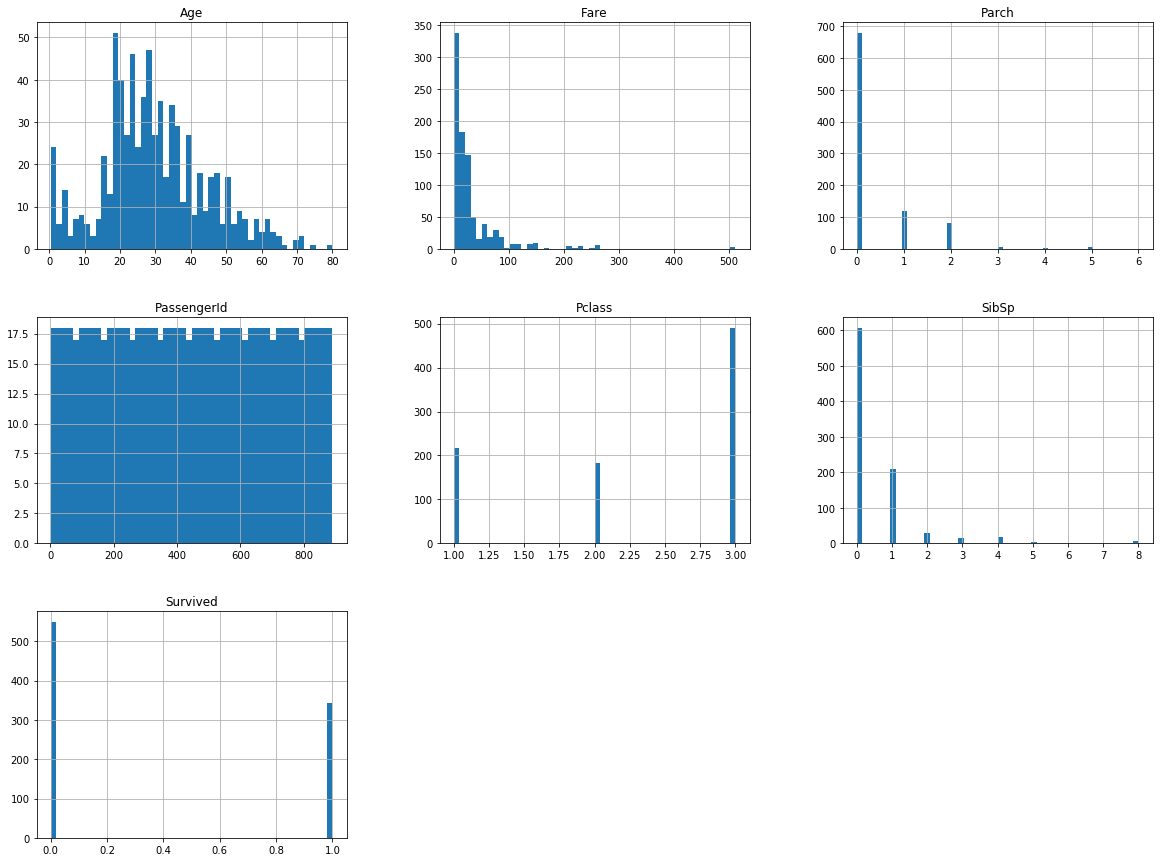

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

### 1.Pclass

In [12]:
print(train_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


We see that Higher class have a significant impact on survivability

### 2.Sex

In [13]:
print(train_set[["Survived", "Sex"]].groupby(["Sex"]).mean())

        Survived
Sex             
female  0.742038
male    0.188908


Now we see sex have great impact on the survivability

### 3.Age

We see there are lots of missing data in age, we try two ways of filling the missing data: bfill and ffill

Current Age distribution is:

In [14]:
train_set["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 1.bfill

In [15]:
train_set_bfill = train_set.copy()
train_set_bfill["Age"].fillna(method="bfill", inplace=True)
train_set_bfill["Age"].describe()

count    891.000000
mean      29.870561
std       14.597668
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

#### 2.ffill

In [16]:
train_set_ffill = train_set.copy()
train_set_ffill["Age"].fillna(method="ffill", inplace=True)
train_set_ffill["Age"].describe()

count    891.00000
mean      29.58156
std       14.55459
min        0.42000
25%       20.00000
50%       28.00000
75%       38.00000
max       80.00000
Name: Age, dtype: float64

We see that ffill introduces less distribution change in age group thus is better used

### 4.Cabin

Too many missing values, we should dump this attribute

### 5.Fare

first group fare by 5 different groups, then calculate the probability people survived in differnt group

In [17]:
train_set_fare = train_set.copy()
train_set_fare['CategoricalFare']= pd.qcut(train_set_fare['Fare'], 5)
print(train_set_fare[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

     CategoricalFare  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


We see significant difference between different fare classes which makes sense

### 6.Ticket

Ticket price is non_intuitive and hard to process we just drop it

### 7.Embarked

We fill the Nan field in Embarked with ffill method as above

In [18]:
train_set_ffill = train_set.copy()
train_set_ffill["Embarked"].fillna(method="ffill", inplace=True)
train_set_ffill["Embarked"].describe()

count     891
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Now we check if different Embark place makes difference

In [19]:
train_set_ffill[["Survived", "Embarked"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.556213
Q,0.397436
S,0.336957


In [20]:
train_set_ffill.groupby("Embarked").Embarked.value_counts()

Embarked  Embarked
C         C           169
Q         Q            78
S         S           644
Name: Embarked, dtype: int64

There are more people departed from S than C and Q, so there might be statistical error in the chance people survived. Nonetheless we can still use this information
We see that embark place do make difference

### 8.SibSp

We now check influence of SibSp

In [21]:
train_set[["Survived", "SibSp"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [22]:
train_set_ffill.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

It's obvious that one with one or two sibling and spouse is easier to live. Since it's most women lived, and if they have husband then their husband is likely to let them leave first. Let's Check our assumption

In [23]:
no_sibsp = (train_set["SibSp"]==0)
one_sibsp = (train_set["SibSp"]==1)
two_sibsp = (train_set["SibSp"]==2)
train_set[["Survived", "SibSp", "Sex"]].where(no_sibsp|one_sibsp|two_sibsp).groupby(["SibSp","Sex"]).mean()

Survived
SibSp Sex             
0.0   female  0.787356
      male    0.168203
1.0   female  0.754717
      male    0.310680
2.0   female  0.769231
      male    0.200000

Seems my assumption is wrong. I have no idea why this hapens but lets take this into acoount

### 9.Parch
We now check influence of Parch. Run the same process as for SibSp

In [24]:
train_set[["Survived", "Parch"]].groupby("Parch").mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [25]:
train_set_ffill.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Seems Parch has less influence than Sibsp

### 10.Name
Let's put name attribute aside for now

In [26]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Cleaning

In [55]:
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline, FeatureUnion

In [56]:
set_embarked = set()
for i in train_set["Embarked"]:
    set_embarked.add(i)
list_embarked = list(set_embarked)

Defining some functions used later

In [57]:
class ColumnsImputer(BaseEstimator, TransformerMixin):
    """
    return DataFrame type data
    """
    def __init__(self, columns, method="ffill"):
        self.method = method
        self.columns = columns
    def fit(self, X_train, y_train=None):
        return self
    def transform(self, X_train, y_train=None):
        X_train.is_copy = False
        X_train.loc[:, self.columns] = X_train[self.columns].fillna(method=self.method)
#         X_train[self.columns_].fillna(method=self.method_, inplace=True)
        return X_train

In [125]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Perform one-hot encoding to categorical features.
    cat_feature: freature needed to be encoded
    list_features: list of possible features
    
    if return_df is true, return df type. Else numpy.array
    """
    def __init__(self, cat_features, list_features, return_df=False):
        self.cat_features = cat_features
        self.list_features = list_features
        self.return_df = return_df

    def fit(self, X_cat, y=None):
        return self

    def transform(self, X_cat, y=None):
        X_other_df = X_cat.drop(self.cat_features, axis=1)
        X_cat_df = X_cat[self.cat_features]
#         X_cat_df = pd.DataFrame(X_cat[self.cat_features], columns=self.cat_features)
        X_onehot_df = pd.get_dummies(X_cat_df, columns=self.cat_features, prefix='', prefix_sep='')
        X_onehot_df = X_onehot_df.T.reindex(self.list_features).T.fillna(0)
        X_full_list = pd.concat([X_other_df, X_onehot_df], axis=1)
        if self.return_df:
            return X_full_list
        else:
            return X_full_list.values

In [126]:
class SexBinarizer(BaseEstimator, TransformerMixin):
    """
    return df type data
    """
    def __init__(self):
        self.encoder = LabelEncoder()
    def fit(self, X_train, y_train=None):
        return self
    def transform(self, X_train, y_train=None):
        X_dropped = X_train.drop("Sex", axis=1)
        X_attri = self.encoder.fit_transform(X_train["Sex"])
        # Change the output back to DataFrame
        return X_dropped.assign(**{"Sex": X_attri})

In [127]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    return DataFrame type data
    """
    def __init__(self, columns):
        self.columns = columns
        print(columns)
    def fit(self, X_train, y_train=None):
        return self
    def transform(self, X_train, y_train=None):
        return X_train[self.columns]

In [128]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [129]:
X_train = train_set.drop("Survived", axis=1).set_index("PassengerId")
X_test = test_set.set_index("PassengerId")
y_train = train_set["Survived"].copy()
y_test = load_csv_data(TITANIC_PATH, "gender_submission")
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [130]:
X_train = train_set.drop("Survived", axis=1)
X_test = test_set
y_train = train_set["Survived"].copy()
y_test = load_csv_data(TITANIC_PATH, "gender_submission")
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [131]:
num_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_columns = ["Sex", "Embarked"]
cat_columns_after= ["Sex"] + list_embarked
unneces_columns = ["Name", "Ticket", "Cabin"]
y_columns = ["Survived"]
list_features = num_columns + cat_columns
list_features_after = num_columns + cat_columns_after

Some Testing Lines

In [132]:
impute_pip = Pipeline([
            ("age_imputer", ColumnsImputer("Age")),
            ("embarked_imputer", ColumnsImputer("Embarked")),
        ])
X1 = impute_pip.fit_transform(X_train)
num_pip = Pipeline([
            ("column_selector", ColumnSelector(num_columns)),
            ("standard_scaler", StandardScaler()),
        ])
X2 = num_pip.fit_transform(X1)
cat_pip = Pipeline([
            ("column_selector", ColumnSelector(cat_columns)),
            ("sex_binarizer", SexBinarizer()),
            ("embarked_encoder", CustomLabelEncoder(["Embarked"], list_embarked)),
        ])
X3 = cat_pip.fit_transform(X1)
X3

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


array([[ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.]])

A full pipeline for data preparation

In [133]:
from sklearn.preprocessing import PolynomialFeatures

class DataPrepPip(TransformerMixin, BaseEstimator):
    def __init__(self, age_method="ffill", embarked_method="ffill", feature_importances=None, num_features=None,
                polynomial_degree = 1):
        self.age_method = age_method
        self.embarked_method = embarked_method
        self.num_features = num_features
        self.feature_importances = feature_importances
        self.polynomial_degree = polynomial_degree

    def fit(self, X_train, y_train=None):
        self.impute_pip = Pipeline([
            ("age_imputer", ColumnsImputer(["Age"], method=self.age_method)),
            ("embarked_imputer", ColumnsImputer(["Embarked"], method=self.embarked_method)),
        ])
        
        self.num_pip = Pipeline([
            ("column_selector", ColumnSelector(num_columns)),
            ("standard_scaler", StandardScaler()),
            ("polynomial_features", PolynomialFeatures(degree=self.polynomial_degree))
        ])
        
        self.cat_pip = Pipeline([
            ("column_selector", ColumnSelector(cat_columns)),
            ("sex_binarizer", SexBinarizer()),
            ("embarked_encoder", CustomLabelEncoder("Embarked", list_embarked)),
        ])
        
        if self.num_features and self.feature_importances.any():
            self.data_prep_pip = Pipeline([
                ("impute_pip", self.impute_pip),
                ("union_pip", FeatureUnion(transformer_list = [
                                  ("num_pipeline", self.num_pip),
                                  ("cat_pipeline", cat_pip),
                              ])
                ),
                ("top_feature_selector", TopFeatureSelector(self.feature_importances, self.num_features))
            ])
        else:
            self.data_prep_pip = Pipeline([
                ("impute_pip", impute_pip),
                ("union_pip", FeatureUnion(transformer_list = [
                                  ("num_pipeline", self.num_pip),
                                  ("cat_pipeline", self.cat_pip),
                              ])
                ),
            ])
        return self
    
    def transform(self, X_train, y_train=None):
        return self.data_prep_pip.fit_transform(X_train)
        

In [134]:
prep_pip = DataPrepPip()
X_train_pr = prep_pip.fit_transform(X_train)
X_train_pr[:2]

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


array([[ 1.        ,  0.82737724, -0.52119766,  0.43279337, -0.47367361,
        -0.50244517,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.        , -1.56610693,  0.57872934,  0.43279337, -0.47367361,
         0.78684529,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [135]:
prep_pip

DataPrepPip(age_method='ffill', embarked_method='ffill',
      feature_importances=None, num_features=None, polynomial_degree=1)

## Prototype model to determine importance of feature

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

forest_clf_1 = RandomForestClassifier()

In [137]:
forest_clf_1.fit(X_train_pr, y_train)
feature_importances = forest_clf_1.feature_importances_
feature_importances

array([ 0.        ,  0.09008079,  0.28561753,  0.04822869,  0.04890552,
        0.21839502,  0.26802015,  0.        ,  0.00674991,  0.01971647,
        0.01428591])

### now we can write whole pipeline

In [138]:
full_pip = Pipeline([
    ("data_prep_pip", DataPrepPip()),
    ("forest_clf", RandomForestClassifier()),
])

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
param_dict = {
              "data_prep_pip__age_method": ["bfill", "ffill"], 
              "data_prep_pip__embarked_method": ["bfill", "ffill"],
              "data_prep_pip__num_features": [i for i in range(2, 11)],
              "forest_clf__n_estimators": [i for i in range(5, 15)],
              "forest_clf__max_features": ["auto", "log2", None],
              "forest_clf__criterion": ["gini", "entropy"],
              "data_prep_pip__feature_importances": [forest_clf_1.feature_importances_],
             }

random_forest_clf = RandomizedSearchCV(full_pip, param_dict, n_iter=30, cv=5, scoring="accuracy")

# A cross-model comparison

The following code is copied from:
    https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anacond

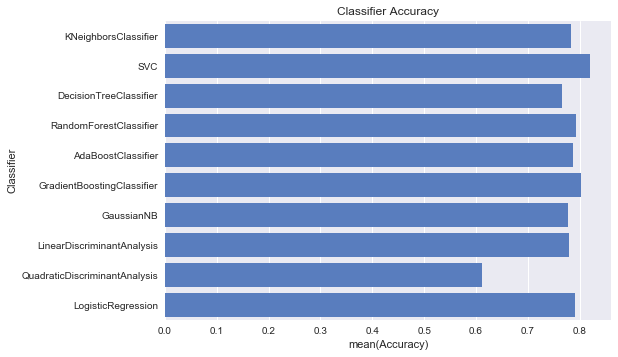

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
#     LinearRegression()
]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)


acc_dict = {}

for train_index, test_index in sss.split(X_train_pr, y_train):
    X_train_applied, X_test_applied = X_train_pr[train_index], X_train_pr[test_index]
    y_train_applied, y_test_applied = y_train[train_index], y_train[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train_applied, y_train_applied)
        train_predictions = clf.predict(X_test_applied)
        acc = accuracy_score(y_test_applied, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

We see SVC is the best working models here.

Let's do a grid search on SVC

In [142]:
import scipy

svc_full_pip = Pipeline([
    ("data_prep_pip", DataPrepPip()),
    ("svc_clf", SVC()),
])

param_dict = {
              "data_prep_pip__age_method": ["bfill", "ffill"], 
              "data_prep_pip__embarked_method": ["bfill", "ffill"],
              "data_prep_pip__num_features": [i for i in range(2, 11)],
              "data_prep_pip__feature_importances": [forest_clf_1.feature_importances_],
              "svc_clf__C": scipy.stats.expon(scale=100),
              "svc_clf__gamma": scipy.stats.expon(scale=.1),
              "svc_clf__kernel": ['rbf', "poly", "sigmoid"], 
              "svc_clf__class_weight":['balanced', None],
              "svc_clf__probability": [True, False],
              "data_prep_pip__polynomial_degree": [1, 2, 3]
             }

random_svc_clf = RandomizedSearchCV(svc_full_pip, param_dict, n_iter=50, cv=3, scoring="accuracy", verbose=2)

In [143]:
random_svc_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=4, data_prep_pip__polynomial_degree=2, svc_clf__C=77.0120079398, svc_clf__class_weight=balanced, svc_clf__gamma=0.000306332852896, svc_clf__kernel=poly, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=4, data_prep_pip__polynomial_degree=2, svc_clf__C=77.0120079398, svc_clf__class_weight=balanced, svc_clf__gamma=0.000306332852896, svc_clf__ker

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=4, data_prep_pip__polynomial_degree=2, svc_clf__C=77.0120079398, svc_clf__class_weight=balanced, svc_clf__gamma=0.000306332852896, svc_clf__kernel=poly, svc_clf__probability=True, total=   0.1s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=4, data_prep_pip__polynomial_degree=2, svc_clf__C=120.954053823, svc_clf__class_weight=None, svc_clf__gamma=0.00267479785033, svc_clf__kernel=rbf, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=2, data_prep_pip__polynomial_degree=3, svc_clf__C=85.0820479822, svc_clf__class_weight=balanced, svc_clf__gamma=0.0170553848959, svc_clf__kernel=sigmoid, svc_clf__probability=True, total=   0.1s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=2, data_prep_pip__polynomial_degree=3, svc_clf__C=85.0820479822, svc_clf__class_weight=balanced, svc_clf__gamma=0.0170553848959, svc_clf__kernel=sigmoid, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  dat

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=10, data_prep_pip__polynomial_degree=3, svc_clf__C=85.5829442726, svc_clf__class_weight=balanced, svc_clf__gamma=0.0684506343952, svc_clf__kernel=rbf, svc_clf__probability=False, total=   0.1s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=10, data_prep_pip__polynomial_degree=3, svc_clf__C=85.5829442726, svc_clf__class_weight=balanced, svc_clf__gamma=0.0684506343952, svc_clf__kernel=rbf, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_pr

[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=6, data_prep_pip__polynomial_degree=2, svc_clf__C=119.7023027, svc_clf__class_weight=balanced, svc_clf__gamma=0.13782327448, svc_clf__kernel=poly, svc_clf__probability=True, total=   0.7s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=6, data_prep_pip__polynomial_degree=2, svc_clf__C=119.7023027, svc_clf__class_weight=balanced, svc_clf__gamma=0.13782327448, svc_clf__kernel=poly, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__ag

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=6, data_prep_pip__polynomial_degree=3, svc_clf__C=79.8208862225, svc_clf__class_weight=None, svc_clf__gamma=0.0667311238223, svc_clf__kernel=poly, svc_clf__probability=False, total=   0.1s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=6, data_prep_pip__polynomial_degree=3, svc_clf__C=79.8208862225, svc_clf__class_weight=None, svc_clf__gamma=0.0667311238223, svc_clf__kernel=poly, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=10, data_prep_pip__polynomial_degree=2, svc_clf__C=179.379185372, svc_clf__class_weight=balanced, svc_clf__gamma=0.137243523839, svc_clf__kernel=rbf, svc_clf__probability=False, total=   0.2s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=8, data_prep_pip__polynomial_degree=1, svc_clf__C=10.3417250478, svc_clf__class_weight=balanced, svc_clf__gamma=0.0775065459143, svc_clf__kernel=sigmoid, svc_clf__probability=True 
['Pclass', '

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=6, data_prep_pip__polynomial_degree=1, svc_clf__C=36.527426976, svc_clf__class_weight=balanced, svc_clf__gamma=0.0657893891378, svc_clf__kernel=poly, svc_clf__probability=True, total=   0.1s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=7, data_prep_pip__polynomial_degree=3, svc_clf__C=419.317053832, svc_clf__class_weight=None, svc_clf__gamma=0.00578001598253, svc_clf__kernel=rbf, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip_

[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=5, data_prep_pip__polynomial_degree=1, svc_clf__C=27.4878531415, svc_clf__class_weight=None, svc_clf__gamma=0.00574369304599, svc_clf__kernel=sigmoid, svc_clf__probability=False, total=   0.0s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=5, data_prep_pip__polynomial_degree=1, svc_clf__C=27.4878531415, svc_clf__class_weight=None, svc_clf__gamma=0.00574369304599, svc_clf__kernel=sigmoid, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_pr

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=10, data_prep_pip__polynomial_degree=1, svc_clf__C=13.7933156146, svc_clf__class_weight=balanced, svc_clf__gamma=0.0979656243393, svc_clf__kernel=sigmoid, svc_clf__probability=False, total=   0.1s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=7, data_prep_pip__polynomial_degree=3, svc_clf__C=19.4917195792, svc_clf__class_weight=None, svc_clf__gamma=0.167876334173, svc_clf__kernel=sigmoid, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_

[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=10, data_prep_pip__polynomial_degree=3, svc_clf__C=72.1837729487, svc_clf__class_weight=None, svc_clf__gamma=0.0564563347047, svc_clf__kernel=rbf, svc_clf__probability=True, total=   0.3s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=8, data_prep_pip__polynomial_degree=1, svc_clf__C=16.1786991733, svc_clf__class_weight=None, svc_clf__gamma=0.0638273528784, svc_clf__kernel=poly, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__a

[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=8, data_prep_pip__polynomial_degree=1, svc_clf__C=4.36931802332, svc_clf__class_weight=balanced, svc_clf__gamma=0.132798911575, svc_clf__kernel=rbf, svc_clf__probability=True, total=   0.1s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=9, data_prep_pip__polynomial_degree=3, svc_clf__C=139.055539553, svc_clf__class_weight=balanced, svc_clf__gamma=0.0274937173806, svc_clf__kernel=poly, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_p

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=4, data_prep_pip__polynomial_degree=1, svc_clf__C=95.5571435104, svc_clf__class_weight=balanced, svc_clf__gamma=0.0823473897727, svc_clf__kernel=rbf, svc_clf__probability=False, total=   0.1s
[CV] data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=4, data_prep_pip__polynomial_degree=1, svc_clf__C=95.5571435104, svc_clf__class_weight=balanced, svc_clf__gamma=0.0823473897727, svc_clf__kernel=rbf, svc_clf__probability=False 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=5, data_prep_pip__polynomial_degree=2, svc_clf__C=45.67814548, svc_clf__class_weight=None, svc_clf__gamma=0.00459676957907, svc_clf__kernel=poly, svc_clf__probability=True, total=   0.1s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=5, data_prep_pip__polynomial_degree=2, svc_clf__C=45.67814548, svc_clf__class_weight=None, svc_clf__gamma=0.00459676957907, svc_clf__kernel=poly, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp'

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=2, data_prep_pip__polynomial_degree=3, svc_clf__C=86.6913266632, svc_clf__class_weight=None, svc_clf__gamma=0.0116963607051, svc_clf__kernel=rbf, svc_clf__probability=True, total=   0.2s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=2, data_prep_pip__polynomial_degree=3, svc_clf__C=86.6913266632, svc_clf__class_weight=None, svc_clf__gamma=0.0116963607051, svc_clf__kernel=rbf, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp'

[CV]  data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=bfill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=7, data_prep_pip__polynomial_degree=3, svc_clf__C=56.095464186, svc_clf__class_weight=balanced, svc_clf__gamma=0.175353631003, svc_clf__kernel=rbf, svc_clf__probability=False, total=   0.1s
[CV] data_prep_pip__age_method=bfill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=2, data_prep_pip__polynomial_degree=3, svc_clf__C=267.616376801, svc_clf__class_weight=balanced, svc_clf__gamma=0.129200871334, svc_clf__kernel=rbf, svc_clf__probability=True 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  data_prep_pip

[CV]  data_prep_pip__age_method=ffill, data_prep_pip__embarked_method=ffill, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__num_features=9, data_prep_pip__polynomial_degree=2, svc_clf__C=114.40931527, svc_clf__class_weight=None, svc_clf__gamma=0.0658179227032, svc_clf__kernel=poly, svc_clf__probability=True, total=   0.5s
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   25.6s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('data_prep_pip', DataPrepPip(age_method='ffill', embarked_method='ffill',
      feature_importances=None, num_features=None, polynomial_degree=1)), ('svc_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'data_prep_pip__age_method': ['bfill', 'ffill'], 'data_prep_pip__embarked_method': ['bfill', 'ffill'], 'data_prep_pip__num_features': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'data_prep_pip__feature_importances': [array([ 0.     ,  0.09008,  0.28562,  0.04823,  0.04891,  0.2184 ,
        0...anced', None], 'svc_clf__probability': [True, False], 'data_prep_pip__polynomial_degree': [1, 2, 3]},
          pre_dispatch='2*n_jobs', ra

In [144]:
random_svc_clf.best_params_

{'data_prep_pip__age_method': 'bfill',
 'data_prep_pip__embarked_method': 'bfill',
 'data_prep_pip__feature_importances': array([ 0.        ,  0.09008079,  0.28561753,  0.04822869,  0.04890552,
         0.21839502,  0.26802015,  0.        ,  0.00674991,  0.01971647,
         0.01428591]),
 'data_prep_pip__num_features': 9,
 'data_prep_pip__polynomial_degree': 1,
 'svc_clf__C': 22.752542919163197,
 'svc_clf__class_weight': None,
 'svc_clf__gamma': 0.04654400214032664,
 'svc_clf__kernel': 'rbf',
 'svc_clf__probability': False}

In [145]:
random_svc_clf.best_estimator_

Pipeline(memory=None,
     steps=[('data_prep_pip', DataPrepPip(age_method='bfill', embarked_method='bfill',
      feature_importances=array([ 0.     ,  0.09008,  0.28562,  0.04823,  0.04891,  0.2184 ,
        0.26802,  0.     ,  0.00675,  0.01972,  0.01429]),
      num_features=9, polynomial_degree=1)), ('svc_clf', SVC(C=22....f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [146]:
from sklearn.model_selection import cross_val_score

svc_score = cross_val_score(random_svc_clf.best_estimator_, X_train, y_train, cv=10, verbose=2)
svc_score.mean()

[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.1s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ...................................

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


0.82717398706162759

## Try SGD clf

In [147]:
from sklearn.linear_model import SGDClassifier

sgd_full_pip = Pipeline([
    ("data_prep_pip", DataPrepPip()),
    ("sgd_clf", SGDClassifier()),
])

param_dict_sgd = {
              "data_prep_pip__age_method": ["bfill", "ffill"], 
              "data_prep_pip__embarked_method": ["bfill", "ffill"],
              "data_prep_pip__num_features": [i for i in range(2, 11)],
              "data_prep_pip__feature_importances": [forest_clf_1.feature_importances_],
              "sgd_clf__loss": ["hinge", "log", "squared_loss"],
              "sgd_clf__penalty": ["l2", "l1"],
              "sgd_clf__class_weight":['balanced', None],
              "data_prep_pip__polynomial_degree": [1, 2, 3],
             }

random_sgd_clf = RandomizedSearchCV(sgd_full_pip, param_dict_sgd, n_iter=50, cv=3, scoring="accuracy", verbose=2)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [148]:
random_sgd_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=2, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=2, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=2, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=2, data_prep_

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=4, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=4, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=balanced, d

  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=squared_loss, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=3, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=squared_loss, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=3, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pcl

[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=10, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=bfill, total=   0.0s
[CV] sgd_clf__penalty=l2, sgd_clf__loss=log, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=5, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=log, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=5, data_prep_pip

[CV]  sgd_clf__penalty=l2, sgd_clf__loss=log, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=3, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill, total=   0.0s
[CV] sgd_clf__penalty=l2, sgd_clf__loss=log, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=3, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=log, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=3, data

[CV]  sgd_clf__penalty=l1, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=2, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=2, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_pre

[CV]  sgd_clf__penalty=l2, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=9, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill, total=   0.0s
[CV] sgd_clf__penalty=l2, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=9, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=9, data_prep_

  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=4, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=1, data_prep_pip__num_features=4, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] 

[CV]  sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=10, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=10, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=6, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=log, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=10, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=log, sgd_clf__class_weight=balance

['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=9, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=9, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l2, sgd_clf__loss=squared_loss, sgd_clf__class_weight=balanced, data_prep_pip__polynomia

[CV] sgd_clf__penalty=l1, sgd_clf__loss=log, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=6, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=log, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=6, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=log, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=6, data_prep_pip__fe

[CV]  sgd_clf__penalty=l2, sgd_clf__loss=log, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=2, data_prep_pip__num_features=9, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=ffill, data_prep_pip__age_method=ffill, total=   0.0s
[CV] sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=3, data_prep_pip__feature_importances=[ 0.          0.09008079  0.28561753  0.04822869  0.04890552  0.21839502
  0.26802015  0.          0.00674991  0.01971647  0.01428591], data_prep_pip__embarked_method=bfill, data_prep_pip__age_method=bfill 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV]  sgd_clf__penalty=l1, sgd_clf__loss=hinge, sgd_clf__class_weight=None, data_prep_pip__polynomial_degree=3, data_prep_pip__num_features=3, data_prep_pi

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.6s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('data_prep_pip', DataPrepPip(age_method='ffill', embarked_method='ffill',
      feature_importances=None, num_features=None, polynomial_degree=1)), ('sgd_clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit...'l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'data_prep_pip__age_method': ['bfill', 'ffill'], 'data_prep_pip__embarked_method': ['bfill', 'ffill'], 'data_prep_pip__num_features': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'data_prep_pip__feature_importances': [array([ 0.     ,  0.09008,  0.28562,  0.04823,  0.04891,  0.2184 ,
        0..., 'l1'], 'sgd_clf__class_weight': ['balanced', None], 'data_prep_pip__polynomial_degree': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,


In [149]:
random_sgd_clf.cv_results_

{'mean_fit_time': array([ 0.02334921,  0.02487906,  0.03228307,  0.02401789,  0.01973208,
         0.01993529,  0.02017196,  0.02196232,  0.02721119,  0.03216728,
         0.01954095,  0.02138376,  0.01507497,  0.01629059,  0.0166796 ,
         0.01638834,  0.01692367,  0.01719666,  0.01587796,  0.02018778,
         0.018984  ,  0.02020359,  0.01930459,  0.02829472,  0.01449498,
         0.01600472,  0.01358755,  0.01535702,  0.01484799,  0.01518337,
         0.01415737,  0.01377781,  0.01484497,  0.01355537,  0.01561165,
         0.01391101,  0.01549999,  0.01537379,  0.02409697,  0.01769114,
         0.01542981,  0.01851829,  0.02205968,  0.01741982,  0.01357222,
         0.01352676,  0.01301336,  0.0143911 ,  0.01300987,  0.0140516 ]),
 'mean_score_time': array([ 0.01360663,  0.01748832,  0.0244476 ,  0.01856168,  0.01651271,
         0.0189867 ,  0.01306391,  0.01573602,  0.01823115,  0.01862868,
         0.01318765,  0.0165259 ,  0.01060605,  0.01127362,  0.01414076,
         0.01

In [150]:
cross_val_score(random_sgd_clf.best_estimator_, X_train, y_train, cv=10, verbose=2).mean()

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']
[CV] ....................................

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


0.70046646237657462

bad model!